# Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Utility functions

In [7]:
def get_symmetric_colorbar_limits(x):
    # Get the 99th percentile to remove outliers
    vmin = np.percentile(x, 0.01)
    vmax = np.percentile(x, 99.99)

    # Set symmetric color limits based on the most extreme value
    if abs(vmin) > abs(vmax):
        vmax = -vmin
    else:
        vmin = -vmax
    return {'vmin': vmin, 'vmax': vmax}

In [8]:
# Enable LaTeX rendering only if matplotlib can actually use LaTeX
def check_latex_available():
    """Test if matplotlib can actually use LaTeX by attempting a simple render."""
    import matplotlib
    
    # Save current backend and rcParams settings
    original_backend = matplotlib.get_backend()
    original_rcParams = plt.rcParams.copy()
    
    try:
        # Use Agg backend to avoid display issues
        test_fig = plt.figure()
        test_ax = test_fig.add_subplot(111)
        # Try to enable LaTeX
        plt.rcParams['text.usetex'] = True
        # Attempt to render simple LaTeX text
        test_ax.text(0.5, 0.5, r'$\alpha$')
        test_fig.canvas.draw()
        plt.close(test_fig)
        # Restore backend and all original settings
        matplotlib.use(original_backend, force=True)
        plt.rcParams.update(original_rcParams)
        return True
    except Exception as e:
        # print(f"LaTeX not available for matplotlib: {e}")
        # Restore backend and all original settings
        matplotlib.use(original_backend, force=True)
        plt.rcParams.update(original_rcParams)
        return False
if check_latex_available():
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (14, 6)
    plt.rcParams['font.size'] = 16
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Computer Modern Roman']
    plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb}'
    print("LaTeX rendering enabled.")
else:
    print("LaTeX not available. Using default matplotlib rendering.")

LaTeX rendering enabled.


# Plot adjoint method illustration

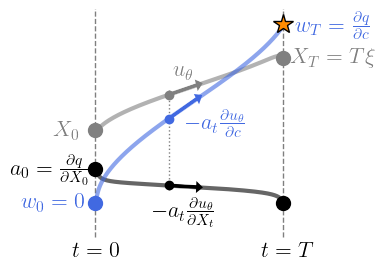

In [9]:
# Set up the figure
fontsize = 16
fig, ax2 = plt.subplots(1, 1, figsize=(4, 3))

# Time points (we'll use this as x-axis, with t=T on right, t=0 on left)
t = np.linspace(0, 5, 1000)

# Forward flow trajectory (grey) - from T*xi at t=T to X_0 at t=0
# This should be a smooth curve going from right to left
Txi_position = [4.8, 2.5]  # Starting position at t=T
X_0_position = [0.2, 1.0]  # Ending position at t=0

# Create smooth trajectory using a sigmoid-like function
forward_x = 4.8 - 4.6 * (1 / (1 + np.exp(-2 * (t - 2.5))))
forward_y = 2.5 - 1.5 * (1 / (1 + np.exp(-1.5 * (t - 2.5)))) + 0.3 * np.sin(0.8 * t) * np.exp(-0.3 * t)

# Plot forward flow trajectory in grey
ax2.plot(forward_x, forward_y, color='grey', linewidth=3, alpha=0.6, zorder=3)

# Mark X_0 at t=0 (left end) and T*xi at t=T (right end)
ax2.plot(X_0_position[0], X_0_position[1], 'o', color='grey', markersize=10, zorder=5)
ax2.plot(Txi_position[0], Txi_position[1], 'o', color='grey', markersize=10, zorder=5)

# Add LaTeX labels for the forward trajectory endpoints
ax2.text(X_0_position[0] - 0.4, X_0_position[1], r'$X_0$', 
        fontsize=fontsize, color='grey', fontweight='bold', 
        verticalalignment='center', horizontalalignment='right', zorder=6)
ax2.text(Txi_position[0] + 0.15, Txi_position[1], r'$X_T=T\xi$', 
        fontsize=fontsize, color='grey', fontweight='bold', 
        verticalalignment='center', horizontalalignment='left', zorder=6)

# Backward adjoint trajectory (black) - from ∂q/∂X_0 at t=0 to t=T
adjoint_start = [0.2, 0.2]  # Starting at t=0
adjoint_end = [4.8, -0.5]   # Ending at t=T

# Create smooth backward trajectory
adjoint_x = 0.2 + 4.6 * (1 / (1 + np.exp(-2 * (t - 2.5))))
adjoint_y = 0.2 - 0.7 * (1 / (1 + np.exp(-1.5 * (t - 2.5)))) - 0.2 * np.sin(1.2 * t) * np.exp(-0.2 * t)

# Plot backward adjoint trajectory in black
ax2.plot(adjoint_x, adjoint_y, color='black', linewidth=3, alpha=0.6, zorder=3)

# Mark the starting point of adjoint (∂q/∂X_0) and ending point
ax2.plot(adjoint_start[0], adjoint_start[1], 'o', color='black', markersize=10, zorder=5)
ax2.plot(adjoint_end[0], adjoint_end[1], 'o', color='black', markersize=10, zorder=5)

# Add LaTeX label for adjoint starting point
ax2.text(adjoint_start[0] - 0.15, adjoint_start[1], r'$a_0=\frac{\partial q}{\partial X_0}$', 
        fontsize=fontsize, color='black', fontweight='bold', 
        verticalalignment='center', horizontalalignment='right', zorder=6)

# Backward gradient trajectory (royalblue) - from w_0=0 at t=0 to w_T=∂q/∂c at t=T
gradient_start = [0.2, -0.5]  # Starting at t=0 (w_0 = 0)
gradient_end = [4.8, 3.2]     # Ending at t=T (w_T = ∂q/∂c)

# Create smooth gradient trajectory
gradient_x = 0.2 + 4.6 * (1 / (1 + np.exp(-2 * (t - 2.5))))
gradient_y = -0.5 + 3.7 * (1 / (1 + np.exp(-1.5 * (t - 2.5)))) + 0.4 * np.sin(0.6 * t) * np.exp(-0.3 * t)

# Plot backward gradient trajectory in royalblue
ax2.plot(gradient_x, gradient_y, color='royalblue', linewidth=3, alpha=0.6, zorder=3)

# Mark the starting point (w_0 = 0) and ending point (w_T = ∂q/∂c)
ax2.plot(gradient_start[0], gradient_start[1], 'o', color='royalblue', markersize=10, zorder=5)
ax2.plot(gradient_end[0], gradient_end[1], '*', color='darkorange', markersize=15, zorder=5, 
        markeredgecolor='black', markeredgewidth=1)

# Add LaTeX labels for gradient trajectory
ax2.text(gradient_start[0] - 0.25, gradient_start[1], r'$w_0 = 0$', 
        fontsize=fontsize, color='royalblue', fontweight='bold', 
        verticalalignment='center', horizontalalignment='right', zorder=6)
ax2.text(gradient_end[0] + 0.27, gradient_end[1], r'$w_T = \frac{\partial q}{\partial c}$', 
        fontsize=fontsize, color='royalblue', fontweight='bold', 
        verticalalignment='center', horizontalalignment='left', zorder=6)

# Mark points at x=1.2 on all three trajectories with tangent arrows
x_mark = 2.0

# Find y-values at x=1.2 for each trajectory
# For forward trajectory
idx_forward = np.argmin(np.abs(forward_x - x_mark))
y_forward_mark = forward_y[idx_forward]

# For adjoint trajectory
idx_adjoint = np.argmin(np.abs(adjoint_x - x_mark))
y_adjoint_mark = adjoint_y[idx_adjoint]

# For gradient trajectory
idx_gradient = np.argmin(np.abs(gradient_x - x_mark))
y_gradient_mark = gradient_y[idx_gradient]

# Plot smaller dots at x=1.2
ax2.plot(x_mark, y_forward_mark, 'o', color='grey', markersize=6, zorder=5)
ax2.plot(x_mark, y_adjoint_mark, 'o', color='black', markersize=6, zorder=5)
ax2.plot(x_mark, y_gradient_mark, 'o', color='royalblue', markersize=6, zorder=5)

# Calculate tangent directions (approximate derivatives)
dx = 0.01
arrow_length = 0.7

# Forward trajectory - arrow pointing left (negative direction)
if idx_forward > 0 and idx_forward < len(forward_x) - 1:
    forward_slope = (forward_y[idx_forward+1] - forward_y[idx_forward-1]) / (forward_x[idx_forward+1] - forward_x[idx_forward-1])
else:
    forward_slope = (forward_y[idx_forward] - forward_y[idx_forward-1]) / (forward_x[idx_forward] - forward_x[idx_forward-1])

# Normalize and scale for arrow (pointing left)
forward_dx = arrow_length
forward_dy = forward_slope * forward_dx
ax2.arrow(x_mark, y_forward_mark, forward_dx, forward_dy, 
         head_width=0.12, head_length=0.08, fc='grey', ec='grey', linewidth=2, zorder=6)

# Adjoint trajectory - arrow pointing right (positive direction)
if idx_adjoint > 0 and idx_adjoint < len(adjoint_x) - 1:
    adjoint_slope = (adjoint_y[idx_adjoint+1] - adjoint_y[idx_adjoint-1]) / (adjoint_x[idx_adjoint+1] - adjoint_x[idx_adjoint-1])
else:
    adjoint_slope = (adjoint_y[idx_adjoint] - adjoint_y[idx_adjoint-1]) / (adjoint_x[idx_adjoint] - adjoint_x[idx_adjoint-1])

adjoint_dx = arrow_length
adjoint_dy = adjoint_slope * adjoint_dx
ax2.arrow(x_mark, y_adjoint_mark, adjoint_dx, adjoint_dy, 
         head_width=0.12, head_length=0.08, fc='black', ec='black', linewidth=2, zorder=6)

# Gradient trajectory - arrow pointing right (positive direction)
if idx_gradient > 0 and idx_gradient < len(gradient_x) - 1:
    gradient_slope = (gradient_y[idx_gradient+1] - gradient_y[idx_gradient-1]) / (gradient_x[idx_gradient+1] - gradient_x[idx_gradient-1])
else:
    gradient_slope = (gradient_y[idx_gradient] - gradient_y[idx_gradient-1]) / (gradient_x[idx_gradient] - gradient_x[idx_gradient-1])

gradient_dx = arrow_length
gradient_dy = gradient_slope * gradient_dx
ax2.arrow(x_mark, y_gradient_mark, gradient_dx, gradient_dy, 
         head_width=0.12, head_length=0.08, fc='royalblue', ec='royalblue', linewidth=2, zorder=6)

# Add vertical dotted line connecting the three points
y_min_mark = min(y_forward_mark, y_adjoint_mark, y_gradient_mark) - 0.1
y_max_mark = max(y_forward_mark, y_adjoint_mark, y_gradient_mark) + 0.1
ax2.plot([x_mark, x_mark], [y_min_mark, y_max_mark], 
        color='black', linestyle=':', linewidth=1, alpha=0.5, zorder=1)

# Add gradient value labels for each arrow
# Forward trajectory label (above the arrow)
ax2.text(x_mark + forward_dx/2, y_forward_mark + forward_dy/2 + 0.2, r'$u_{\theta}$', 
        fontsize=fontsize, color='grey', fontweight='bold', 
        verticalalignment='bottom', horizontalalignment='center', zorder=6)

# Adjoint trajectory label (below the arrow)
ax2.text(x_mark + adjoint_dx/2, y_adjoint_mark + adjoint_dy/2 - 0.2, r'$-a_t\frac{\partial u_{\theta}}{\partial X_t}$', 
        fontsize=fontsize, color='black', fontweight='bold', 
        verticalalignment='top', horizontalalignment='center', zorder=6)

# Gradient trajectory label (to the right of the arrow)
ax2.text(x_mark + gradient_dx - 0.3, y_gradient_mark + gradient_dy/2 - 0.3, r'$-a_t\frac{\partial u_{\theta}}{\partial c}$', 
        fontsize=fontsize, color='royalblue', fontweight='bold', 
        verticalalignment='center', horizontalalignment='left', zorder=6)

# Add time axis labels
ax2.text(0.21, -1.5, r'$t = 0$', fontsize=fontsize, color='black', fontweight='bold', 
        verticalalignment='center', horizontalalignment='center', zorder=6)
ax2.text(4.85, -1.5, r'$t = T$', fontsize=fontsize, color='black', fontweight='bold', 
        verticalalignment='center', horizontalalignment='center', zorder=6)

# Add vertical dashed lines to mark t=0 and t=T (stopping at a lower bound to avoid clashing with text)
ax2.plot([0.2, 0.2], [-1.2, 4.0], color='black', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
ax2.plot([4.8, 4.8], [-1.2, 4.0], color='black', linestyle='--', linewidth=1, alpha=0.5, zorder=1)

# Customize the plot
ax2.set_xlim(-0.5, 5.5)
ax2.set_ylim(-1.5, 3.5)

# Remove all spines and ticks for cleaner look
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])

# Add subtle grid
# ax2.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)

plt.tight_layout()

# save in pdf format.
plt.savefig("adjoint_illustration.pdf", bbox_inches='tight')
plt.show()
plt.close()

